# Week 19 Group Activity

### 1. Take one of the supervised learning models you have built recently and apply at least three dimensionality reduction techniques to it (separately). Be sure to create a short summary of each technique you use. Indicate how each changed the model performance. 
Reference:
https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus

from IPython.display import Image

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [3]:
# decision tree classifier
model = tree.DecisionTreeClassifier(max_depth = 6,random_state=4)

In [4]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

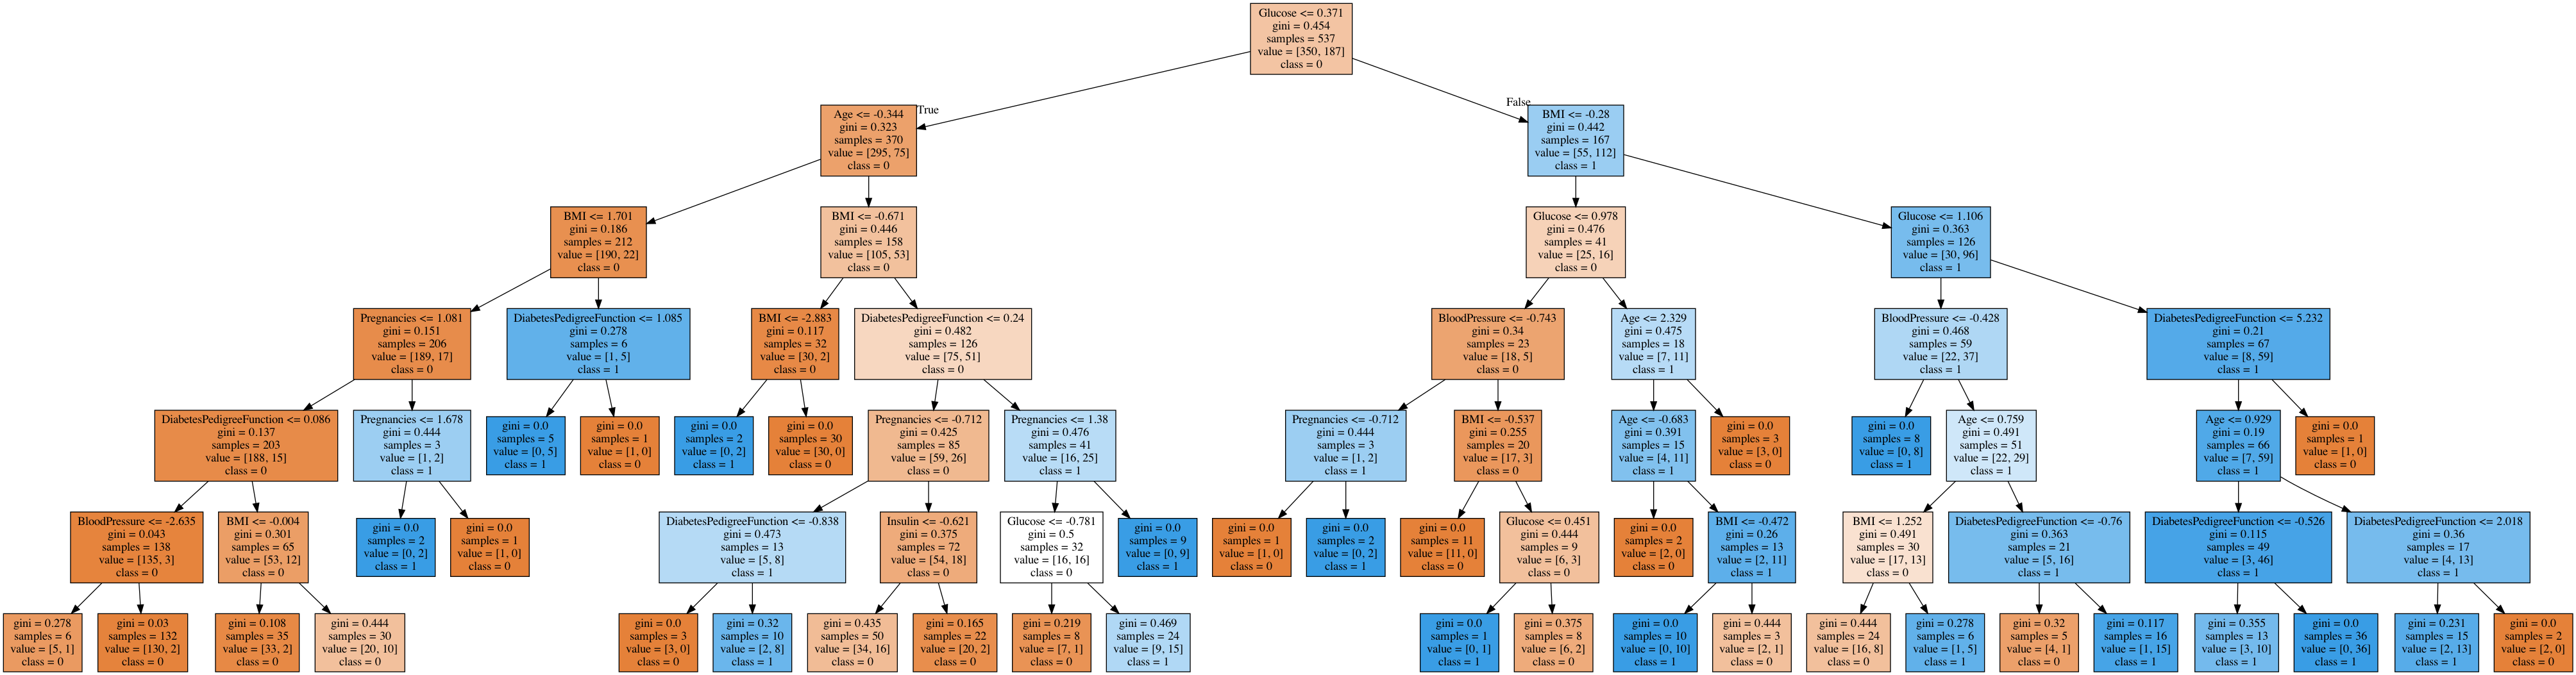

In [7]:
dot_data = tree.export_graphviz(
    model, out_file =None, feature_names=X.columns, class_names = ["0","1"], filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [8]:
# Print the accuracy
print("test accuracy: " + str(model.score(X_test, y_test)))

# Print the accuracy
print("train accuracy: " + str(model.score(X_train, y_train)))

test accuracy: 0.8051948051948052
train accuracy: 0.8808193668528864


### Principal Component Analysis
PCA reduces the total number of features or x variables to only include the most important ones that show the most variation. It removes correlated variables that may be redundant with these but show less variation.

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.fit_transform(X_test)

model = tree.DecisionTreeClassifier(max_depth = 6,random_state=4).fit(X_train_pca, y_train)

# Print the accuracy
print("test accuracy: " + str(model.score(X_test_pca, y_test)))

# Print the accuracy
print("train accuracy: " + str(model.score(X_train_pca, y_train)))

test accuracy: 0.5714285714285714
train accuracy: 0.8770949720670391


PCA had seemingly no effect on the accuracy of the decision tree model.

### Singular Value Decomposition
tracting only the most important ones. However, it also rebuilds the original data set but as a small set of data points.

In [9]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=7)

X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.fit_transform(X_test)

model = tree.DecisionTreeClassifier(max_depth = 6,random_state=4).fit(X_train_svd, y_train)

# Print the accuracy
print("test accuracy: " + str(model.score(X_test_svd, y_test)))

# Print the accuracy
print("train accuracy: " + str(model.score(X_train_svd, y_train)))

test accuracy: 0.5714285714285714
train accuracy: 0.8770949720670391


SVD also had no effect onthe accuracy score of the decision tree model.

### Isomap Embedding
Isomap embedding embeds the data and separates it into groups of "neighbors," then estimates the curved distance between neighbors to determine how to reduce dimensionality.

In [11]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=7)

X_train_iso=iso.fit_transform(X_train)
X_test_iso=iso.fit_transform(X_test)

model = tree.DecisionTreeClassifier(max_depth = 6,random_state=4).fit(X_train_iso, y_train)

# Print the accuracy
print("test accuracy: " + str(model.score(X_test_iso, y_test)))

# Print the accuracy
print("train accuracy: " + str(model.score(X_train_iso, y_train)))

test accuracy: 0.5584415584415584
train accuracy: 0.8491620111731844


Isomap embedding reduced accuracy scores for both the training data and the test data.

### 2. Write a function that will indicate if an inputted IPv4 address is accurate or not. IP addresses are valid if they have 4 values between 0 and 255 (inclusive), punctuated by periods.
* Input 1: 2.33.245.5
* Output 1: True


* Input 2: 12.345.67.89
* Output 2: False

In [12]:
def ipv4():
    ip = input('Enter IP address: ')
    ip = str(ip)
    w,x,y,z = ip.split(".", 4)
    list_str = [w,x,y,z]
    list_int = [int(n) for n in list_str]
    if all(n in range (0,256) for n in list_int):
        return True
    else:
        return False

In [13]:
#Test that 2.33.245.5 returns "True":
ipv4()

Enter IP address: 2.33.245.5


True

In [14]:
#Test that 12.345.67.89 returns "False":
ipv4()

Enter IP address: 12.345.67.89


False